# Checkpoint 1
<br>


## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(330327, 6)

In [ ]:
dados_paises_covid_dead.shape

(330327, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [ ]:
dados_covid.tail()

,province,country,Lat,Long,date,infected,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276,5671


In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [ ]:
dados_covid.shape

(330327, 7)

## Aqui começam as respostas

## Questão 1

In [ ]:
dados_covid["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [71]:
len(dados_covid["country"].unique()) -5

196

Na lista fornecida, os elementos que não são países ou territórios são:
<br>
<br>

<br>
Diamond Princess (nome de um navio de cruzeiro)
<br>
MS Zaandam (nome de um navio de cruzeiro)
<br>
Summer Olympics 2020 (evento esportivo)
<br>

Winter Olympics 2022 (evento esportivo)
<br>
<br>
descobrimos usando o comando "dados_covid["country"].unique()" e são 201 países mas subtraindo esses não países ficam 197


Questão 2 

achamos o valor de infectados e mortos no Brasil, italia e estados unidos identificando a ultima linha de cada país.
<br>
Brasil : infectados 37076053 e mortos 699276
<br>
Estados Unidos : infectados = 103802702 e mortos = 1123836
<br>
Italia : infectados = 25603510  e mortos = 188322


In [ ]:
dados_covid[dados_covid['country'].isin(['Italy', 'US', 'Brazil'])].tail(3)

,province,country,Lat,Long,date,infected,dead
330069,NaN,Brazil,-14.23500,-51.92530,2023-03-09,37076053,699276
330192,NaN,Italy,41.87194,12.56738,2023-03-09,25603510,188322
330298,NaN,US,40.00000,-100.00000,2023-03-09,103802702,1123836


###Correção

In [65]:
data_maxima = np.max(dados_covid['date'])

In [68]:
paises_filtro = ['Brazil', 'US', 'Italy']

In [69]:
dados_covid[(dados_covid['date'] == data_maxima)
          & (dados_covid['country'].isin(paises_filtro))]

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
330069,NaN,Brazil,-14.23500,-51.92530,2023-03-09,37076053,699276,0.018861
330192,NaN,Italy,41.87194,12.56738,2023-03-09,25603510,188322,0.007355
330298,NaN,US,40.00000,-100.00000,2023-03-09,103802702,1123836,0.010827


###Correção

###Questão 3 

In [ ]:
dados_covid.sort_values('infected', ascending = True).tail(1000)

,province,country,Lat,Long,date,infected,dead
323233,NaN,France,46.2276,2.2137,2023-02-13,38522794,160965
323522,NaN,France,46.2276,2.2137,2023-02-14,38527780,161000
323811,NaN,France,46.2276,2.2137,2023-02-15,38531752,161035
324100,NaN,France,46.2276,2.2137,2023-02-16,38535773,161062
324967,NaN,France,46.2276,2.2137,2023-02-19,38539362,161090
...,...,...,...,...,...,...,...
328853,NaN,US,40.0000,-100.0000,2023-03-04,103650837,1122172
329431,NaN,US,40.0000,-100.0000,2023-03-06,103655539,1122181
329720,NaN,US,40.0000,-100.0000,2023-03-07,103690910,1122516
330009,NaN,US,40.0000,-100.0000,2023-03-08,103755771,1123246


In [ ]:
dados_covid[dados_covid['infected'].between(37136414,103802702)].tail()

,province,country,Lat,Long,date,infected,dead
330009,NaN,US,40.000000,-100.000000,2023-03-08,103755771,1123246
330169,NaN,France,46.227600,2.213700,2023-03-09,38618509,161512
330173,NaN,Germany,51.165691,10.451526,2023-03-09,38249060,168935
330186,NaN,India,20.593684,78.962880,2023-03-09,44690738,530779
330298,NaN,US,40.000000,-100.000000,2023-03-09,103802702,1123836


In [ ]:
dados_covid[(dados_covid['country']=='Exemplo') & (dados_covid['infected'] < 103802702)]

,province,country,Lat,Long,date,infected,dead


###Questão 3

Resposta da 3
<br>
dados_covid.sort_values('infected', ascending = True).tail()
<br>
este comando mostra uma tabela crescente
<br>
usamos a função do colab de mostrar mais detalhes da tabela
<br>
após ver os 10 mais infectados
<br>
usamos o comando novamente trocando a coluna de "infected" para "dead'
<br>
então obtivemos a resposta que é esta :
<br>
<br>
Numero de mortos:
1° USA,
<BR>
2° BRASIL,
<BR>
3° INDIA,
<BR>
4° RUSSIA,
<BR>
5° MEXICO,
<BR>
6° REINO UNIDO,
<BR>
7° PERU,
<BR>
8° ITALIA,
<BR>
9°ALEMANHA,
<BR>
10° FRANÇA
<BR>
<br>
<BR>
Numero de infectados:

1 - USA,
<BR>
2- INDIA,
<BR>
3- FRANÇA,
<BR>
4 - ALEMANHA,
<BR>
5- BRASIL,
<BR>
6 - JAPÃO,
<BR>
7 - COREIA DO SUL,
<BR>
8 - ITALIA,
<BR>
9 - REINO UNIDO,
<BR>
10 - RUSSIA

###Questão 4 

In [ ]:
#Resposta 


#dados_covid['taxa_mortalidade'] = dados_covid['dead'] / dados_covid['infected']
#dados_covid[dados_covid['date'] == '2022-09-03'].sort_values('taxa_mortalidade', ascending = True).tail(14)

#usamos este código para dividir a quantidade de infectados pela quantidade de mortos, exibindo uma coluna chamada taxa de mortalidade

In [78]:

dados_covid['taxa_mortalidade'] = dados_covid['dead'] / dados_covid['infected']
dados_covid[dados_covid['date'] == '2023-03-09'].sort_values('taxa_mortalidade', ascending = True).tail(14)

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
330067,NaN,Bosnia and Herzegovina,43.915900,17.679100,2023-03-09,401729,16280,0.040525
330223,NaN,Mexico,23.634500,-102.552800,2023-03-09,7483444,333188,0.044523
330149,NaN,Egypt,26.820553,30.802498,2023-03-09,515759,24812,0.048108
330253,NaN,Peru,-9.190000,-75.015200,2023-03-09,4487553,219539,0.048922
330276,NaN,Somalia,5.152149,46.199616,2023-03-09,27324,1361,0.049810
330127,Unknown,China,NaN,NaN,2023-03-09,1521816,82195,0.054011
330286,NaN,Syria,34.802075,38.996815,2023-03-09,57467,3164,0.055058
330110,Hubei,China,30.975600,112.270700,2023-03-09,72131,4515,0.062594
330281,NaN,Sudan,12.862800,30.217600,2023-03-09,63829,5017,0.078601
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159,0.180745


###Questão 5


a) Gráfico  de  linhas  contendo  a  evolução  do  número  de  infectados  do  Brasil e Estados Unidos.

In [ ]:
dados_covid [['country', 'date', 'infected']]

,country,date,infected
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
330322,West Bank and Gaza,2023-03-09,703228
330323,Winter Olympics 2022,2023-03-09,535
330324,Yemen,2023-03-09,11945
330325,Zambia,2023-03-09,343135


In [ ]:
grafico_brasil = dados_covid[dados_covid['country'].isin(['Brazil',])]
grafico_brasil

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
31,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0,NaN
320,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0,NaN
609,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0,NaN
898,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0,NaN
1187,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0,NaN
...,...,...,...,...,...,...,...,...
328913,NaN,Brazil,-14.235,-51.9253,2023-03-05,37081209,699276,0.018858
329202,NaN,Brazil,-14.235,-51.9253,2023-03-06,37076053,699276,0.018861
329491,NaN,Brazil,-14.235,-51.9253,2023-03-07,37076053,699276,0.018861
329780,NaN,Brazil,-14.235,-51.9253,2023-03-08,37076053,699276,0.018861


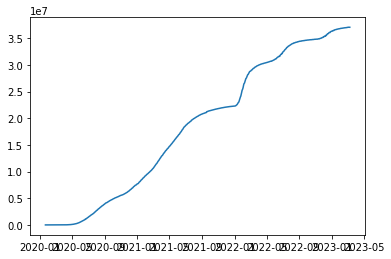

In [ ]:
grafico_brasil1 = plt.plot(grafico_brasil['date'],grafico_brasil['infected'])

In [ ]:
grafico_us = dados_covid[dados_covid['country'].isin(['US',])]
grafico_us


,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
260,NaN,US,40.0,-100.0,2020-01-22,1,0,0.000000
549,NaN,US,40.0,-100.0,2020-01-23,1,0,0.000000
838,NaN,US,40.0,-100.0,2020-01-24,2,0,0.000000
1127,NaN,US,40.0,-100.0,2020-01-25,2,0,0.000000
1416,NaN,US,40.0,-100.0,2020-01-26,5,0,0.000000
...,...,...,...,...,...,...,...,...
329142,NaN,US,40.0,-100.0,2023-03-05,103646975,1122134,0.010827
329431,NaN,US,40.0,-100.0,2023-03-06,103655539,1122181,0.010826
329720,NaN,US,40.0,-100.0,2023-03-07,103690910,1122516,0.010826
330009,NaN,US,40.0,-100.0,2023-03-08,103755771,1123246,0.010826


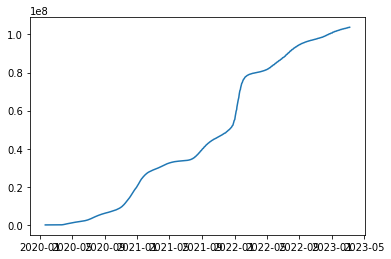

In [ ]:
grafico_us1 = plt.plot(grafico_us['date'],grafico_us['infected'])


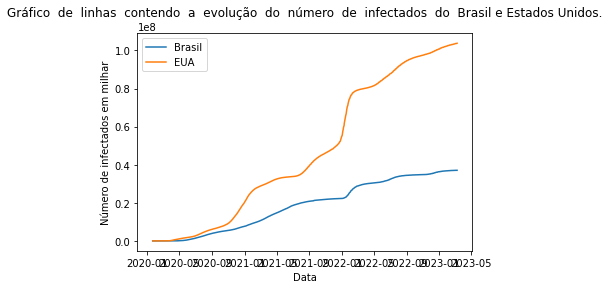

In [ ]:

plt.plot(grafico_brasil['date'], grafico_brasil['infected'], label='Brasil')

plt.plot(grafico_us['date'], grafico_us['infected'], label='EUA')

plt.title('Gráfico  de  linhas  contendo  a  evolução  do  número  de  infectados  do  Brasil e Estados Unidos.')
plt.xlabel('Data')
plt.ylabel('Número de infectados em milhar')

plt.legend()


plt.show()


###5 (B)

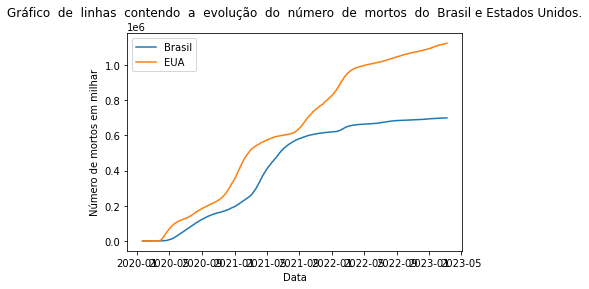

In [ ]:

plt.plot(grafico_brasil['date'], grafico_brasil['dead'], label='Brasil')

plt.plot(grafico_us['date'], grafico_us['dead'], label='EUA')

plt.title('Gráfico  de  linhas  contendo  a  evolução  do  número  de  mortos  do  Brasil e Estados Unidos.')
plt.xlabel('Data')
plt.ylabel('Número de mortos em milhar')
plt.legend()

plt.show()

###5(C)

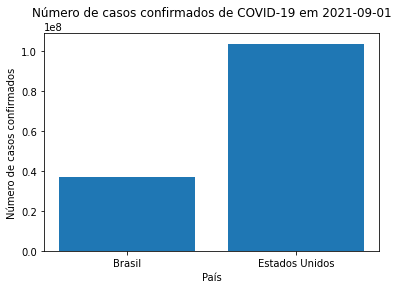

In [ ]:
df_confirmed = pd.read_csv(path)
df_dead = pd.read_csv(path_dead)

# Filtrando dados do Brasil e dos Estados Unidos
br_confirmed = df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].iloc[:, 4:].sum()
us_confirmed = df_confirmed[df_confirmed['Country/Region'] == 'US'].iloc[:, 4:].sum()

# Criando o gráfico de barras
fig, ax = plt.subplots()
ax.bar(['Brasil', 'Estados Unidos'], [br_confirmed.iloc[-1], us_confirmed.iloc[-1]])
ax.set_xlabel('País')
ax.set_ylabel('Número de casos confirmados')
ax.set_title('Número de casos confirmados de COVID-19 em 2021-09-01')
plt.show()

###5(D)

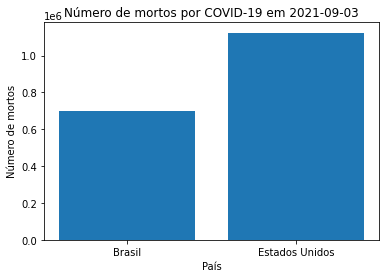

In [ ]:
path_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df_confirmed = pd.read_csv(path_confirmed)
df_deaths = pd.read_csv(path_deaths)

# Selecionando dados do Brasil e Estados Unidos
br_deaths = df_deaths[df_deaths['Country/Region'] == 'Brazil'].iloc[:, 4:].sum()
us_deaths = df_deaths[df_deaths['Country/Region'] == 'US'].iloc[:, 4:].sum()

# Criando o gráfico de barras
fig, ax = plt.subplots()
ax.bar(['Brasil', 'Estados Unidos'], [br_deaths.iloc[-1], us_deaths.iloc[-1]])
ax.set_xlabel('País')
ax.set_ylabel('Número de mortos')
ax.set_title('Número de mortos por COVID-19 em 2021-09-03')
plt.show()

###5 (E)

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#grafico_us_filtrado = grafico_us.loc[grafico_us["date"] == "03-09-2023"]

grafico_us_filtrado = grafico_us_filtrado.loc[grafico_us_filtrado["date"] == "2023-03-09"]


NameError: ignored

In [ ]:
#grafico_brasil_filtrado = grafico_brasil.loc[grafico_brasil["date"] == "03-09-2023"]
#data_especifica = "2022-03-15"

grafico_brasil_filtrado = grafico_brasil_filtrado.loc[grafico_brasil_filtrado["date"] == "2023-03-09"]



NameError: ignored

###Abaixo obtivemos um absurdo 
<br>
deixamos para seu entretenimento 

In [ ]:
#plt.bar(grafico_us_filtrado["date"], grafico_us_filtrado["taxa_mortalidade"], width=0.15, label="US")
#plt.bar(grafico_brasil_filtrado["date"], grafico_brasil_filtrado["taxa_mortalidade"], width=0.10, label="Brazil")


plt.bar(grafico_us_filtrado["date"], grafico_us_filtrado["taxa_mortalidade"], label="US")
plt.bar(grafico_brasil_filtrado["date"], grafico_brasil_filtrado["taxa_mortalidade"], label="Brazil")

plt.title("taxa de mortalidade de Brasil e Estados Unidos em 09/mar.")
plt.xlabel("Data")
plt.ylabel("Mortalidade")
plt.legend()

plt.show()


NameError: ignored

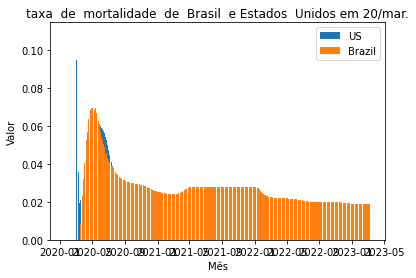

In [ ]:
#grafico_us (1DF)
#grafico_brasil (2DF)
#taxa_mortalidade

plt.bar(grafico_us["date" ], grafico_us["taxa_mortalidade"], label="US")
plt.bar(grafico_brasil["date"], grafico_brasil["taxa_mortalidade"], label="Brazil")

plt.title("taxa  de  mortalidade  de  Brasil  e Estados  Unidos em 20/mar.")
plt.xlabel("Mês")
plt.ylabel("Valor")
plt.legend()

plt.show()


In [ ]:
grafico_us

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
260,NaN,US,40.0,-100.0,2020-01-22,1,0,0.000000
549,NaN,US,40.0,-100.0,2020-01-23,1,0,0.000000
838,NaN,US,40.0,-100.0,2020-01-24,2,0,0.000000
1127,NaN,US,40.0,-100.0,2020-01-25,2,0,0.000000
1416,NaN,US,40.0,-100.0,2020-01-26,5,0,0.000000
...,...,...,...,...,...,...,...,...
329142,NaN,US,40.0,-100.0,2023-03-05,103646975,1122134,0.010827
329431,NaN,US,40.0,-100.0,2023-03-06,103655539,1122181,0.010826
329720,NaN,US,40.0,-100.0,2023-03-07,103690910,1122516,0.010826
330009,NaN,US,40.0,-100.0,2023-03-08,103755771,1123246,0.010826


In [ ]:
grafico_us.dtypes

province                    object
country                     object
Lat                        float64
Long                       float64
date                datetime64[ns]
infected                     int64
dead                         int64
taxa_mortalidade           float64
dtype: object

In [ ]:
grafico_brasil.dtypes

province                    object
country                     object
Lat                        float64
Long                       float64
date                datetime64[ns]
infected                     int64
dead                         int64
taxa_mortalidade           float64
dtype: object

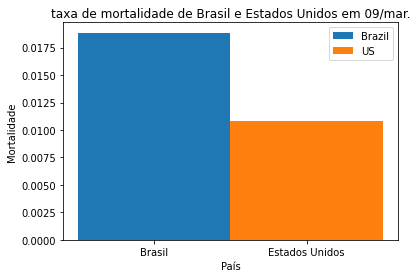

In [ ]:
grafico_us = grafico_us.loc[grafico_us["date"] == "2023-03-09"]
grafico_brasil = grafico_brasil.loc[grafico_brasil["date"] == "2023-03-09"]

# Define a posição das barras no eixo x
posicao_brasil = 0
posicao_eua = 0.4

plt.bar(posicao_brasil, grafico_brasil["taxa_mortalidade"], width=0.4, label="Brazil")
plt.bar(posicao_eua, grafico_us["taxa_mortalidade"], width=0.4, label="US")

plt.title("taxa de mortalidade de Brasil e Estados Unidos em 09/mar.")
plt.xlabel("País")
plt.ylabel("Mortalidade")
plt.xticks([posicao_brasil, posicao_eua], ["Brasil", "Estados Unidos"])
plt.legend()

plt.show()
